In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

In [2]:
## Data Analysis is inspired by the following tutorial

## https://medium.com/analytics-vidhya/exploratory-data-analysis-of-nyc-taxi-trip-duration-dataset-using-python-257fdef2749e

In [3]:
os.chdir(r'D:\Projects\MobilityForecast\Repo\mobilityforecast\data')

In [4]:
df = pd.read_parquet('yellow_tripdata_2022-01.parquet',engine='pyarrow')
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
std,5.021375e-01,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00


In [5]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [6]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [7]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
df = df.drop(columns=['store_and_fwd_flag'])
df = df.dropna(axis=0)
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [9]:
fare_outlier_max = df['fare_amount'].mean() + (df['fare_amount'].std()*3)
fare_outlier_min = 0

tot_fare_outlier_max = df['total_amount'].mean() + (df['total_amount'].std()*3)
tot_fare_outlier_min = 0

trip_dist_outlier_max = df['trip_distance'].mean() + (df['trip_distance'].std()*3)
trip_dist_outlier_min = 0

In [10]:
## removing the outliers in the data..

fare_max_ind = df.index[df['fare_amount'] > fare_outlier_max].tolist()
fare_min_ind = df.index[df['fare_amount'] < fare_outlier_min].tolist()

tot_fare_max_ind = df.index[df['total_amount'] > tot_fare_outlier_max].tolist()
tot_fare_min_ind = df.index[df['total_amount'] < tot_fare_outlier_min].tolist()

trip_dist_ind_max = df.index[df['trip_distance'] > trip_dist_outlier_max].tolist()
trip_dist_ind_min = df.index[df['trip_distance'] < trip_dist_outlier_min].tolist()

ind = sorted(fare_max_ind + fare_min_ind + tot_fare_max_ind + tot_fare_min_ind + trip_dist_ind_max + trip_dist_ind_min)

In [11]:
df = df.drop(ind)

In [12]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06,2.294311e+06
mean,1.694279e+00,1.385274e+00,2.491837e+00,1.361611e+00,1.669882e+02,1.644169e+02,1.218334e+00,1.120076e+01,1.031655e+00,4.974311e-01,2.158244e+00,2.081546e-01,2.998824e-01,1.705988e+01,2.329645e+00,5.220739e-02
std,4.607122e-01,9.831657e-01,2.508519e+00,5.734400e+00,6.575878e+01,7.041438e+01,4.314811e-01,8.571109e+00,1.204483e+00,3.594329e-02,2.223190e+00,1.202214e+00,5.937313e-03,1.030135e+01,6.299712e-01,2.500673e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,8.300000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.680000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,2.850000e+00,1.000000e+00,2.360000e+02,2.360000e+02,1.000000e+00,1.300000e+01,2.500000e+00,5.000000e-01,2.950000e+00,0.000000e+00,3.000000e-01,1.895000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,1.602000e+01,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,7.200000e+02,3.350000e+01,3.300000e+00,3.030000e+02,8.650000e+01,3.000000e-01,7.228000e+02,2.500000e+00,1.250000e+00


c:\Users\20215176\Anaconda3\envs\mobilityforecast\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


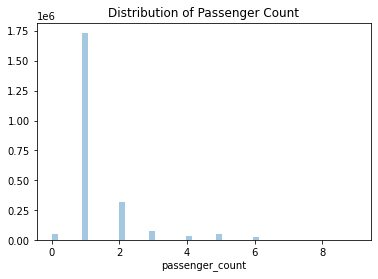

In [13]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

In [14]:
unique_pickup_date_time = df['tpep_pickup_datetime'].nunique()
unique_dropoff_date_time = df['tpep_dropoff_datetime'].nunique()

In [15]:
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()

In [16]:
df['pickup_day'].value_counts()

Monday       345121
Friday       339184
Saturday     338550
Thursday     335173
Wednesday    319166
Sunday       312988
Tuesday      304129
Name: pickup_day, dtype: int64

In [17]:
df['dropoff_day'].value_counts()

Monday       345237
Friday       338314
Saturday     338165
Thursday     334497
Wednesday    319047
Sunday       314633
Tuesday      304418
Name: dropoff_day, dtype: int64

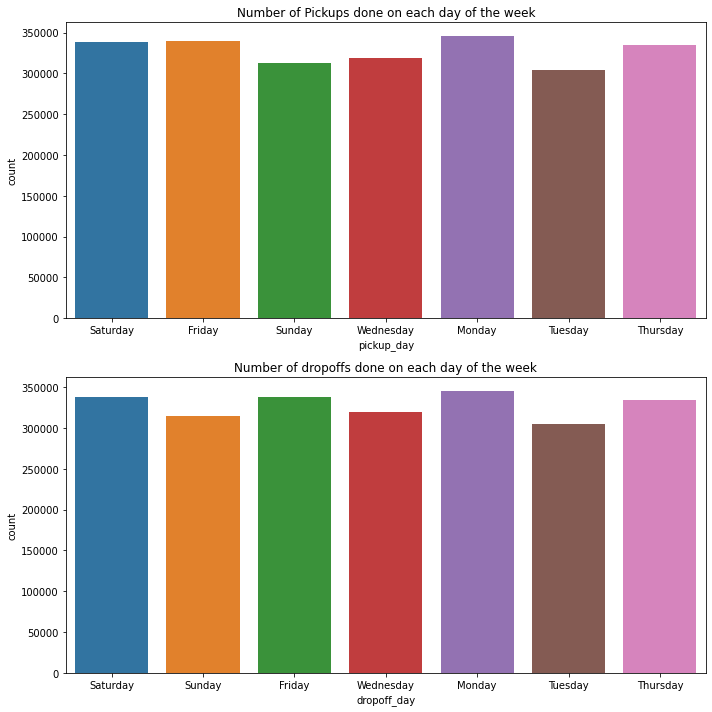

In [18]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [19]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['tpep_pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['tpep_dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

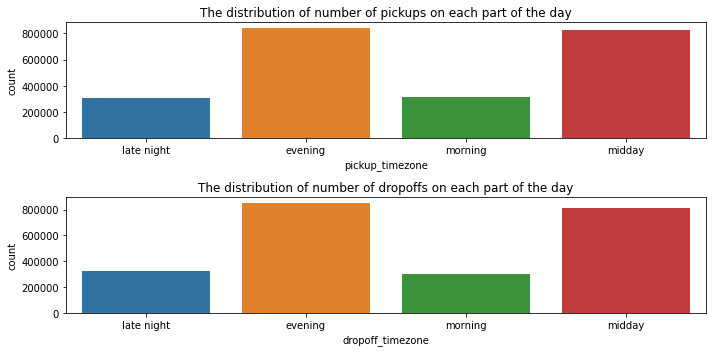

In [20]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of dropoff hours')

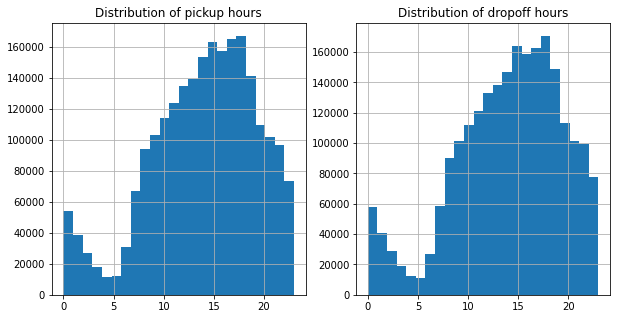

In [21]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')